# Práctica Guiada: Inferencia II

## 1. Haciendo una prueba de hipótesis en `scipy`. Test sobre la media de los Klout Scores.

Volvamos a los  [Klout Scores](https://klout.com/corp/score) que se adjunta en el archivo `klouts_scores.csv`.

Imagine que tomamos como población las 1048 observaciones de Klout scores con las que contamos. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
df = pd.read_csv('../Data/klout_scores.csv', header=None, decimal=",")
df.columns = ['k_score']

In [4]:
df.head()

,k_score
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


In [5]:
df.shape

(1048, 1)

In [6]:
df.describe()

,k_score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


### Consignas

1. Ahora suponga que existe en una consultoría se plantea que la media del Klout Score poblacional es de 38.   Realice una prueba de hipótesis al respecto con un nivel de significación de 0.05. Plantee las hipótesis nula y alternativa. ¿A qué conclusión llega?
2. Suponga que en lugar de definir un nivel de significación de 0.05, se define uno de 0.1. ¿Podría haber cambiado el resultado?
3. ¿Y si la hipótesis nula fuera que la media es 42?

In [7]:
def sampling(df, n, r = False):
    index = np.random.choice(range(0,len(df)), size = n, replace = r)
    df_s  = np.array(df.iloc[index,])
    return(df_s)

def samp_mean(df, n_i):
    means = []
    for reps in range(0,1000):
        s_ = sampling(df, n_i, r = False)
        m_ = s_.mean()
        means.append(m_)
    return(means)

In [8]:
sample = sampling(df,200)

In [9]:
sample.mean()

38.112010684996996

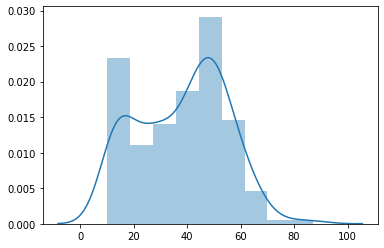

In [10]:
import seaborn as sns
%matplotlib inline
sns.distplot(sample)

In [11]:
st.ttest_1samp(sample,38)

Ttest_1sampResult(statistic=array([0.09541694]), pvalue=array([0.92407968]))

Para responder la pregunta 2 no necesitamos volver a hacer un test, sólo comparamos el p-value contra un nivel de significación $\alpha $ distinto

In [12]:
st.ttest_1samp(sample,42)

Ttest_1sampResult(statistic=array([-3.31200586]), pvalue=array([0.00110009]))

## 2. Tests sobre una proporción

Fuimos contratados por una empresa de lotería para averiguar la proporción de clientes que compra determinado producto. La firma va a mantener su plan de marketing actual si su market share es de 50% o más pero va a triplicar su gasto en publicidad en caso contrario. 

In [13]:
p = 0.4
pruebas = 1
obs  = 100

In [14]:
np.random.seed(10)
data = [n for n in np.random.binomial(pruebas, p, obs)]
df   = pd.DataFrame(data, columns= ['compra o no'])
df.head()

,compra o no
0,1
1,0
2,1
3,1
4,0


### 1 ¿Cuál es la hipótesis nula y cuál es la alternativa?

En $H_{0}$ pondríamos la opción mas costosa en caso de rechazar $H_{0}$ cuando $H_{0}$ es verdadera. En este caso si le decimos a la firma que su market share es menos del 50% va a invertir mucho dinero en publicidad. Por lo que mantendríamos $H_{0}$ : que el market share es mayor o igual a 50% vs $H_{1}$ : el market share es menor de 50%. 
       

### 2 ¿Cuál es el valor empírico del estimador del market share?


In [15]:
market_share_muestral = df.sum() / len(df)
market_share_muestral

compra o no    0.36
dtype: float64

### 3 Conocemos la media y la desviación estándar poblacionales de cada observación. ¿Cuáles son?  

Bajo $H_{0}$  cada $X_i$ (cada variable que mide si una persona responde si o no a la pregunta de si compra el producto) tiene distribución Bernoulli. Bajo $H_{0}$ tomemos el valor del parámetro $p$ de la Bernoulli menos favorable a $H_{0}$ dentro de aquellos posibles asumiendo que $H_{0}$ es verdadera, esto es que $p>=0.5$. 
En este caso entonces $ E(X_i)=0.5 $  y $ V(X_i)=0.5*0.5 $  

In [16]:
p_H0 = 0.5

### 4  ¿Qué distribución tiene la proporción de clientes que compran determinado producto si asumimos que n es lo suficientemente grande?

La media muestral es una suma de variables Bernoulli (cada una con iguales parámetros e inpendientes entre sí) dividido el tamaño muestral. Si n fuera "lo suficientemente grande" la media muestral tendría distribución normal con media igual a $E(Xi)$ y  varianza igual a $ V(Xi)/n $. Sabemos que entonces asintóticamente la media muestral estandarizada tiene distribucion $N(0,1)$. 

### 5 Encuentre un test de hipótesis (estadístico de prueba y regla de decisión) para sus hipótesis del la pregunta 1 con un nivel de significación de 0.05. 

Usamos como estadístico de prueba la media muestral estandarizada del punto anterior. Buscamos una regla que deje probabilidad $ 0.05 $ de rechazar cuando $ H_0 $ es verdadera. Buscamos un valor $ z_{\alpha} $ que deja área $ 0.05 $ en la cola izquierda de una distribución normal estándar (la distribución conocida del estadístico de prueba asumiendo que $ H_0 $ es verdadera). Rechazamos $ H_0 $ si el estadístico de prueba resulta por debajo de ese valor de corte. 

### 6  ¿Qué decisión toma en base a la muestra?


In [17]:
#El valor de corte buscado es..
import scipy.stats as st

alpha=0.05
z = st.norm.ppf(alpha)

#El estadístico de prueba es 
estadistico_prueba = (market_share_muestral-p_H0)/(np.sqrt(p_H0*(1-p_H0)/obs))
#La decisión es..
rechazo = (estadistico_prueba < np.abs(z) )
#decision
print('estadístico prueba:', estadistico_prueba.values[0])
print('estadístico z     :', z)
print('rechazo', rechazo.values)

estadístico prueba: -2.8000000000000003
estadístico z     : -1.6448536269514729
rechazo [ True]


### 7 ¿Cuál es el p-valor?


In [18]:
p_value = st.norm.cdf(estadistico_prueba[0])
p_value

0.002555130330427929

### 8 Construya un intervalo de confianza al 95% de confianza para el market share.  


In [19]:
standard_error = np.sqrt(market_share_muestral*(1-market_share_muestral) / obs)

z_nc95 = np.abs(st.norm.ppf(alpha/2))

li = market_share_muestral-z_nc95*standard_error
ls = market_share_muestral+z_nc95*standard_error

print ("El límite inferior del IC al 95% de confianza para p es ", li[0])
print ("El límite superior del IC al 95% de confianza para p es ", ls[0])

El límite inferior del IC al 95% de confianza para p es  0.26592172874207737
El límite superior del IC al 95% de confianza para p es  0.4540782712579226


### 9. Interpretando el $\alpha$ de un test. 
Dado un nivel de significación hagamos mil repeticiones del test anterior. El nivel de significación indica la proporción de veces que nos vamos a equivocar , y rechazar $ H_0 $ cuando $ H_0 $ es verdadera, al sacar muestras de la misma población y aplicar nuestra regla de decisión dado un valor crítico (que fue elegido en base a un nivel de significación $\alpha$ ). En este caso realizamos un test a dos colas.

In [20]:
#seteamos un valor de p para que H0 sea verdadera
p=0.5
pruebas=1
p_H0 = 0.5
alpha = 0.025
z = np.abs(st.norm.ppf(alpha))
decisiones=[]
rep=1000

for i in range(rep):
    
    df = pd.DataFrame([int(n) for n in np.random.binomial(pruebas, p, obs)], columns= ['compra o no'])
    
    p_muestral = df.sum() / len(df) 
    
    estadistico_prueba = np.abs(p_muestral-p_H0)/ (np.sqrt((p_H0 * (1 - p_H0 )) / obs)) 

    rechazo = (estadistico_prueba > z )
    
    decisiones.append(int(rechazo[0]))

print( sum(decisiones) / rep )


0.051


## A/B Testing

In [21]:
import math

In [22]:
# Definimos una función que calcula los estimadores de los parámetros de una distribución de Bernoulli:

def estimated_parameters(N, n):
    p = n/N
    sigma = math.sqrt(p*(1-p)/N)
    return p, sigma

In [23]:
# Definimos una función que calcula el estadístico de un A/B Test:

def a_b_test_statistic(N_A,n_A,N_B,n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A)/math.sqrt(sigma_A**2 + sigma_B**2)

#### Probamos con un ejemplo. Se realiza un A/B test sobre 2 anuncios de un sitio web: A y B. 

In [24]:
## Definimos un nivel de significación del 5%. Vamos a hacer un test a dos colas:
alpha=0.05
z_crit = np.abs(st.norm.ppf(alpha/2))
z_crit

1.9599639845400545

In [25]:
# Caso 1:
z_est1 = a_b_test_statistic(1000,200,1000,180)

In [26]:
z_est1

-1.1403464899034472

In [27]:
if np.abs(z_est1)>z_crit:
    print('Rechazo H0')
else:
    print('No puedo rechazar H0')

No puedo rechazar H0


In [28]:
p_value = 2*st.norm.cdf(z_est1)
p_value

0.254141976542236

In [29]:
# Caso 2:
z_est2 = a_b_test_statistic(1000,200,1000,150)

In [30]:
z_est2

-2.948839123097944

In [31]:
if np.abs(z_est2)>z_crit:
    print('Rechazo H0')
else:
    print('No puedo rechazar H0')

Rechazo H0


In [32]:
p_value = 2*st.norm.cdf(z_est2)
p_value

0.0031896997062168583